In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(Path('./nmhss-puf-2019-Edited.csv'))
df.head()

,CASEID,MHINTAKE,MHDIAGEVAL,MHREFERRAL,SMISEDSUD,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,...,LICENSED,LICENPH,LICENSEDFCS,LICENHOS,JCAHO,CARF,COA,CMS,OTHSTATE,LST
0,201900001,1,1,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,AK
1,201900002,1,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,AK
2,201900003,1,1,1,1,1,0,0,0,0,...,1,1,0,0,1,0,0,1,0,AK
3,201900004,1,1,1,1,1,0,0,0,0,...,1,1,0,0,1,0,0,1,0,AK
4,201900005,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,AK


In [3]:
df_2 = pd.read_csv(Path('./IncomeData_Edited.csv'))
df_2.head()

,LST,Geographic_Area_Name,County,STATE,id,Estimate_Households_Total,"Estimate_Households_Total_Less_than_10,000","Estimate_Households_Total_$10,000_to_$14,999","Estimate_Households_Total_$15,000_to_$24,999","Estimate_Households_Total_$25,000_to_$34,999",...,EstimateHouseholds!!Median income (dollars),Estimate_Families_Total,"Estimate_Families_Total_Less than $10,000","Estimate_Families_Total_$10,000_to_$14,999","Estimate_Families_Total_$15,000_to_$24,999","Estimate_Families_Total_$25,000_to_$34,999","Estimate_Families_Total_$200,000_or_more",EstimateFamilies!!Median income (dollars),Estimate_Families_Mean_income_$,Estimate!!Families!!PERCENT ALLOCATED!!Family income in the past 12 months
0,AL,"Baldwin County, Alabama",Baldwin County,Alabama,0500000US01003,82325,4.9,3.9,9.4,10.4,...,56439,53962,2.8,1.9,6.2,10.0,9.2,76892,97364,38.0
1,AL,"Calhoun County, Alabama",Calhoun County,Alabama,0500000US01015,44636,9.6,7.3,8.4,13.1,...,48156,28975,7.1,2.0,7.0,10.9,3.4,61918,75168,38.7
2,AL,"Cullman County, Alabama",Cullman County,Alabama,0500000US01043,32090,4.4,5.4,11.0,13.2,...,50906,23212,3.0,1.4,6.7,9.6,3.4,60886,72582,42.7
3,AL,"DeKalb County, Alabama",DeKalb County,Alabama,0500000US01049,24880,7.2,8.4,15.6,7.6,...,44208,16366,4.0,2.5,12.1,7.7,0.7,54871,66524,36.7
4,AL,"Elmore County, Alabama",Elmore County,Alabama,0500000US01051,30712,2.9,1.9,13.2,10.8,...,61854,21146,1.6,1.1,7.7,10.2,7.8,76574,96212,32.8


In [4]:
df_3=pd.merge(df,df_2, on='LST', how='right')
df_3.head()

,CASEID,MHINTAKE,MHDIAGEVAL,MHREFERRAL,SMISEDSUD,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,...,EstimateHouseholds!!Median income (dollars),Estimate_Families_Total,"Estimate_Families_Total_Less than $10,000","Estimate_Families_Total_$10,000_to_$14,999","Estimate_Families_Total_$15,000_to_$24,999","Estimate_Families_Total_$25,000_to_$34,999","Estimate_Families_Total_$200,000_or_more",EstimateFamilies!!Median income (dollars),Estimate_Families_Mean_income_$,Estimate!!Families!!PERCENT ALLOCATED!!Family income in the past 12 months
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56439,53962,2.8,1.9,6.2,10.0,9.2,76892,97364,38.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48156,28975,7.1,2.0,7.0,10.9,3.4,61918,75168,38.7
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50906,23212,3.0,1.4,6.7,9.6,3.4,60886,72582,42.7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44208,16366,4.0,2.5,12.1,7.7,0.7,54871,66524,36.7
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61854,21146,1.6,1.1,7.7,10.2,7.8,76574,96212,32.8


In [5]:
df_3 = df_3.dropna(axis=0, subset=['CASEID'])

In [6]:
# displaying the DataFrame
print('df_3:\n', df_3)
   
# saving the DataFrame as a CSV file
MH_data = df_3.to_csv('EditedMHData.csv', index = True)
print('\nCSV String:\n', EditedMHData.csv)

df_3:
              CASEID  MHINTAKE  MHDIAGEVAL  MHREFERRAL  SMISEDSUD  TREATMT  \
21      201900001.0       1.0         1.0         1.0        1.0      1.0   
22      201900002.0       1.0         1.0         1.0        1.0      1.0   
23      201900003.0       1.0         1.0         1.0        1.0      1.0   
24      201900004.0       1.0         1.0         1.0        1.0      1.0   
25      201900005.0       1.0         1.0         1.0        1.0      1.0   
...             ...       ...         ...         ...        ...      ...   
299224  201912459.0       1.0         1.0         1.0        1.0      1.0   
299225  201912460.0       0.0         1.0         1.0        0.0      0.0   
299226  201912461.0       1.0         1.0         1.0        1.0      1.0   
299227  201912462.0       1.0         1.0         1.0        1.0      1.0   
299228  201912463.0       1.0         1.0         1.0        1.0      1.0   

        ADMINSERV  SETTINGIP  SETTINGRC  SETTINGDTPH  ...  \
21     

PermissionError: [Errno 13] Permission denied

In [7]:
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
contigency= pd.crosstab(df_3['LST'], df_3['ADMINSERV']) 
contigency

ADMINSERV,0.0,1.0
LST,,
AK,448,854
AZ,1930,2280
CA,12997,26035
CO,1056,1224
CT,752,1088
DC,12,27
DE,54,54
FL,11521,9799
GA,3108,5624


In [9]:
contigency_pct = pd.crosstab(df_3['LST'], df_3['ADMINSERV'], normalize='index')
contigency_pct

ADMINSERV,0.0,1.0
LST,,
AK,0.344086,0.655914
AZ,0.458432,0.541568
CA,0.332983,0.667017
CO,0.463158,0.536842
CT,0.408696,0.591304
DC,0.307692,0.692308
DE,0.500000,0.500000
FL,0.540385,0.459615
GA,0.355932,0.644068


<AxesSubplot:xlabel='ADMINSERV', ylabel='LST'>

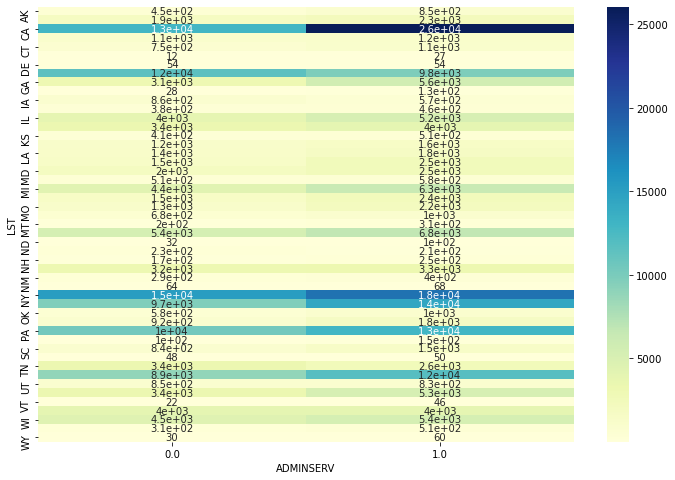

In [10]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [11]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.0
